In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
accidents = pd.read_csv("../PrometneNesreče.csv")

C:\Users\Hana\AppData\Local\Temp\ipykernel_31124\901670543.py:1: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("../PrometneNesreče.csv")


# Analiza prometnih nesreč glede na letni čas

In [39]:
# Priprava podatkov
accidents['NastanekDatumCas'] = pd.to_datetime(accidents['NastanekDatumCas'], format='ISO8601', errors='coerce')
print(f"NastanekDatumCas column dtype: {accidents['NastanekDatumCas'].dtype}")
# display(accidents)

NastanekDatumCas column dtype: datetime64[ns]


Za analizo bom uporabila meteorološke letne čase. Torej:
- zima: december, januar, februar,
- pomlad: marec, april, maj,
- poletje: junij, julij, avgust,
- jesen: september, oktober, november.

Za meteorološke letne čase sem se odločila, ker so bolj stabilni skozi leta in ker v primerjavi s koledarskimi letnimi časi bolj verodostojno odražajo vremenske vzorce, povezane s tveganji za nesreče (npr. poledica že v začetku decembra).

In [20]:
winter_mask = accidents['NastanekDatumCas'].dt.month.isin([12, 1, 2])
spring_mask = accidents['NastanekDatumCas'].dt.month.isin([3, 4, 5])
summer_mask = accidents['NastanekDatumCas'].dt.month.isin([6, 7, 8])
autumn_mask = accidents['NastanekDatumCas'].dt.month.isin([9, 10, 11])

winter_accidents = accidents[winter_mask]
spring_accidents = accidents[spring_mask]
summer_accidents = accidents[summer_mask]
autumn_accidents = accidents[autumn_mask]

# winter_accidents['hour'] = winter_accidents['NastanekDatumCas'].dt.hour
# spring_accidents['hour'] = spring_accidents['NastanekDatumCas'].dt.hour
# summer_accidents['hour'] = summer_accidents['NastanekDatumCas'].dt.hour
# autumn_accidents['hour'] = autumn_accidents['NastanekDatumCas'].dt.hour


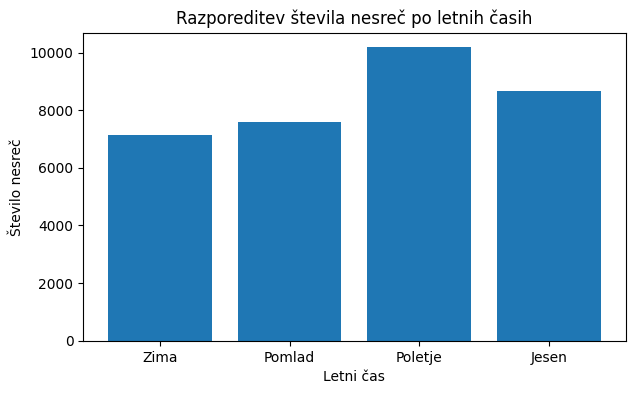

In [23]:
oznake = ['Zima', 'Pomlad', 'Poletje', 'Jesen']
accident_count = [len(winter_accidents),
                  len(spring_accidents),
                  len(summer_accidents),
                  len(autumn_accidents)]

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, accident_count)

plt.xlabel('Letni čas')
plt.ylabel('Število nesreč')
plt.title('Razporeditev števila nesreč po letnih časih')

plt.show()

## **Resnost posledic prometnih nesreč glede na letni čas**

Tri kategorije nesreč:
- **Nesreče brez poškodovancev**: udeleženci niso bili poškodovani in nihče ni umrl
- **Nesreče s poškodbami**: nekateri udeleženci so bili poškodovani, vendar nihče ni umrl
- **Nesreče s smrtnim izidom**: vsaj eden od udeležencev je umrl (v nesreči so bili lahko tudi drugi, ki so bili poškodovani, vendar take nesreče ne štejem v kategorijo "Nesreče s poškodbami")

In [28]:
# Zima
mask_winter_no_injury = (winter_accidents['LjudjePoskodovani'] == 0) & (winter_accidents['LjudjeMrtvi'] == 0)
mask_winter_injury = (winter_accidents['LjudjePoskodovani'] != 0) & (winter_accidents['LjudjeMrtvi'] == 0)
mask_winter_death = (winter_accidents['LjudjeMrtvi'] != 0)

winter_no_injury = winter_accidents[mask_winter_no_injury]
winter_injury = winter_accidents[mask_winter_injury]
winter_death = winter_accidents[mask_winter_death]

# Pomlad
mask_spring_no_injury = (spring_accidents['LjudjePoskodovani'] == 0) & (spring_accidents['LjudjeMrtvi'] == 0)
mask_spring_injury = (spring_accidents['LjudjePoskodovani'] != 0) & (spring_accidents['LjudjeMrtvi'] == 0)
mask_spring_death = (spring_accidents['LjudjeMrtvi'] != 0)

spring_no_injury = spring_accidents[mask_spring_no_injury]
spring_injury = spring_accidents[mask_spring_injury]
spring_death = spring_accidents[mask_spring_death]

# Poletje
mask_summer_no_injury = (summer_accidents['LjudjePoskodovani'] == 0) & (summer_accidents['LjudjeMrtvi'] == 0)
mask_summer_injury = (summer_accidents['LjudjePoskodovani'] != 0) & (summer_accidents['LjudjeMrtvi'] == 0)
mask_summer_death = (summer_accidents['LjudjeMrtvi'] != 0)

summer_no_injury = summer_accidents[mask_summer_no_injury]
summer_injury = summer_accidents[mask_summer_injury]
summer_death = summer_accidents[mask_summer_death]

# Jesen
mask_autumn_no_injury = (autumn_accidents['LjudjePoskodovani'] == 0) & (autumn_accidents['LjudjeMrtvi'] == 0)
mask_autumn_injury = (autumn_accidents['LjudjePoskodovani'] != 0) & (autumn_accidents['LjudjeMrtvi'] == 0)
mask_autumn_death = (autumn_accidents['LjudjeMrtvi'] != 0)

autumn_no_injury = autumn_accidents[mask_autumn_no_injury]
autumn_injury = autumn_accidents[mask_autumn_injury]
autumn_death = autumn_accidents[mask_autumn_death]

In [33]:
accident_count = np.array([len(winter_accidents),
                           len(spring_accidents),
                           len(summer_accidents),
                           len(autumn_accidents)])

## Nesreče brez poškodovancev

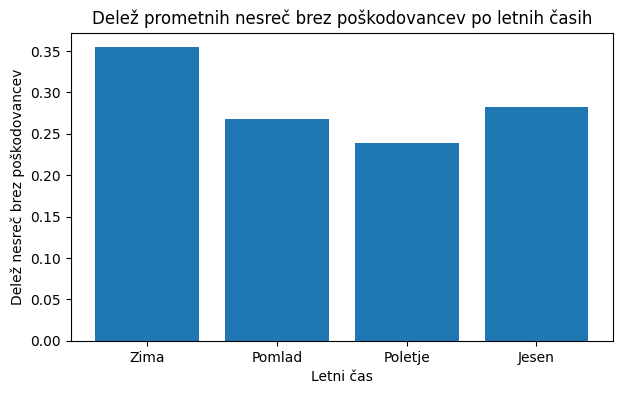

In [36]:
no_injury_count = np.array([len(winter_no_injury),
                  len(spring_no_injury),
                  len(summer_no_injury),
                  len(autumn_no_injury)])

no_injury_proportion = no_injury_count / accident_count

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, no_injury_proportion)

plt.xlabel('Letni čas')
plt.ylabel('Delež nesreč brez poškodovancev')
plt.title('Delež prometnih nesreč brez poškodovancev po letnih časih')

plt.show()

## Nesreče s poškodbami

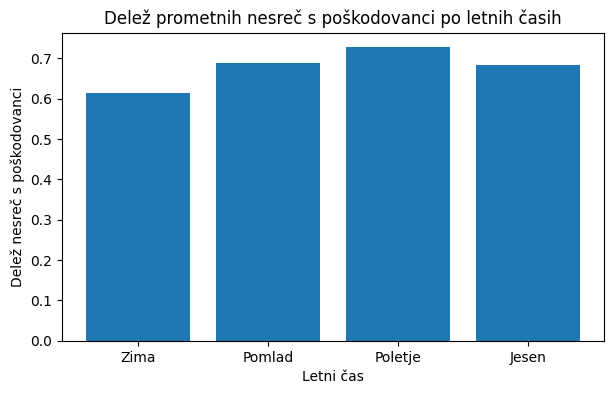

In [37]:
injury_count = np.array([len(winter_injury),
                  len(spring_injury),
                  len(summer_injury),
                  len(autumn_injury)])

injury_proportion = injury_count / accident_count

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, injury_proportion)

plt.xlabel('Letni čas')
plt.ylabel('Delež nesreč s poškodovanci')
plt.title('Delež prometnih nesreč s poškodovanci po letnih časih')

plt.show()

## Nesreče s smrtnim izidom

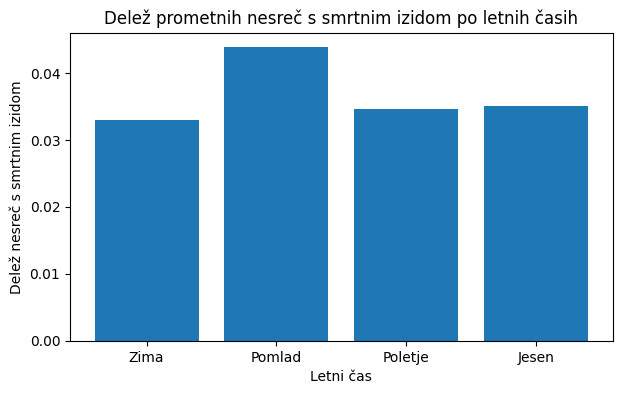

In [38]:
death_count = np.array([len(winter_death),
                  len(spring_death),
                  len(summer_death),
                  len(autumn_death)])

injury_proportion = death_count / accident_count

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, injury_proportion)

plt.xlabel('Letni čas')
plt.ylabel('Delež nesreč s smrtnim izidom')
plt.title('Delež prometnih nesreč s smrtnim izidom po letnih časih')

plt.show()